Boston데이터셋은 Boston 교외 506개 지역에 대한 median 주택가격(medv)과 이와 관련된 13개의 변수가 기록되어 있다. 
 주택당 평균 방의 개수(rm), 평균 주택 연령(age), 사회 경제적 지위가 낮은 가정의 백분율(lstat)과 같은 13개의 변수를 사용하여 medv를 예측하려고 한다. 

| Name    | Description                                                              |
|:---------|:--------------------------------------------------------------------------|
| crim    | per capita crime rate by town.                                           |
| zn      | proportion of residential land zoned for lots over 25,000   sq.ft.       |
| indus   | proportion of non-retail business acres per town.                        |
| chas    | Charles River dummy variable (= 1 if tract bounds river; 0   otherwise). |
| nox     | nitrogen oxides concentration (parts per 10 million).                    |
| rm      | average number of rooms per dwelling.                                    |
| age     | proportion of owner-occupied units built prior to 1940.                  |
| dis     | weighted mean of distances to five Boston employment centres.            |
| rad     | index of accessibility to radial highways.                               |
| tax     | full-value property-tax rate per \$10,000.                               |
| ptratio | pupil-teacher ratio by town.                                             |
| black   | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks   by town.        |
| lstat   | lower status of the population (percent).                                |
| medv    | median value of owner-occupied homes in \$1000s.                         |



1. 13개의 설명변수를 모두 사용하여 medev를 설명하는 회귀모형을 적합하고 각 설명변수의 VIF 값을 계산하시오. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "C:\\Users\\nlp\\Desktop\\통계학 수업\\HW10\\data\\"
boston = pd.read_csv(data_path + "Boston.csv")

In [2]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


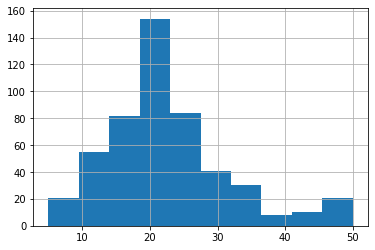

In [4]:
boston.medv.hist()

In [5]:
# bias/variance tradeoff
# in machine learning, CV and 
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [6]:
boston.columns[:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [7]:
len(boston.columns[:-1])

13

In [8]:
fomula = 'medv~'+"+".join(boston.columns[:-1])

In [9]:
fomula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [10]:
model_full = smf.ols(fomula, data=boston).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        19:19:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import patsy
y, X = patsy.dmatrices(fomula, data=boston, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 585.2652379423121
VIF of crim : 1.792191547433241
VIF of zn : 2.2987581787494418
VIF of indus : 3.9915964183460315
VIF of chas : 1.0739953275537883
VIF of nox : 4.393719847577493
VIF of rm : 1.9337444357832565
VIF of age : 3.1008255128153364
VIF of dis : 3.9559449063727263
VIF of rad : 7.484496335274472
VIF of tax : 9.00855394759707
VIF of ptratio : 1.7990840492488978
VIF of black : 1.348521076406375
VIF of lstat : 2.9414910780919366


2. All subset regression을 통해 변수선택을 하시오. AIC, BIC, adjusted R-square를 사용할 때 각 기준에 따라 최적의 모형이 달라지는가?

In [12]:
# 11번 모형 
# 동일하다

In [13]:
import patsy
y, X = patsy.dmatrices(fomula, data=boston, return_type='dataframe')

In [21]:
import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    # X_model = sm.add_constant(X[list(feature_set)])
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic,
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,"r2":regr.rsquared }

def getBest(k, best = "AIC"):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    # Wrap evrything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else:
        best_model = models.loc[models[best].argmin()]
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [22]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2",])

for i in range(1,X.shape[1]-1):
        models_best.loc[i] = getBest(i, best = "AIC")    

Processed 13 models on 1 predictors in 0.03889608383178711 seconds.
Processed 78 models on 2 predictors in 0.2373650074005127 seconds.
Processed 286 models on 3 predictors in 0.7080700397491455 seconds.
Processed 715 models on 4 predictors in 1.5777745246887207 seconds.
Processed 1287 models on 5 predictors in 3.0223381519317627 seconds.
Processed 1716 models on 6 predictors in 4.025890111923218 seconds.
Processed 1716 models on 7 predictors in 3.6510143280029297 seconds.
Processed 1287 models on 8 predictors in 2.934593439102173 seconds.
Processed 715 models on 9 predictors in 1.8675477504730225 seconds.
Processed 286 models on 10 predictors in 0.7642943859100342 seconds.
Processed 78 models on 11 predictors in 0.2373659610748291 seconds.
Processed 13 models on 12 predictors in 0.07080316543579102 seconds.


In [23]:
models_best

,model,RSS,AIC,BIC,adj_r2,r2
1,<statsmodels.regression.linear_model.Regressio...,19472.381418,3286.974957,3295.428030,0.543242,0.544146
2,<statsmodels.regression.linear_model.Regressio...,15439.309201,3171.542314,3184.221924,0.637124,0.638562
3,<statsmodels.regression.linear_model.Regressio...,13727.985314,3114.097267,3131.003414,0.676704,0.678624
4,<statsmodels.regression.linear_model.Regressio...,13228.907703,3097.359045,3118.491728,0.687835,0.690308
5,<statsmodels.regression.linear_model.Regressio...,12469.344151,3069.438633,3094.797853,0.705170,0.708089
6,<statsmodels.regression.linear_model.Regressio...,12141.072736,3057.939050,3087.524806,0.712357,0.715774
7,<statsmodels.regression.linear_model.Regressio...,11868.235607,3048.438383,3082.250676,0.718256,0.722161
8,<statsmodels.regression.linear_model.Regressio...,11678.299470,3042.274993,3080.313823,0.722207,0.726608
9,<statsmodels.regression.linear_model.Regressio...,11526.122446,3037.638096,3079.903463,0.725274,0.730170
10,<statsmodels.regression.linear_model.Regressio...,11308.577606,3029.996540,3076.488444,0.729915,0.735263


3. 위의 2번에서 선택된 최적의 모형들 중 가장 변수의 개수가 적은 모형을 최종모형으로 선택하여 회귀적합 결과와 VIF값을 프린트 하시오. Full model에 비해 VIF 값이 어떻게 변화했는가?

In [ ]:
#11개 일때 최정의 변환 

In [30]:
# 중간고사랑 비슷한 형태의 시험 
# 중간고사 이후부터가 기말고사 범위
print(len([1,2]))
print(len(models_best))
print(models_best["BIC"].argmin())
print(models_best["AIC"].argmin())
print(models_best["adj_r2"].argmax())
models_best.iloc[models_best["adj_r2"].argmax(), 0]

2
12
10
10
10


In [33]:
models_best.loc[11]["model"]

In [36]:
models_best.iloc[models_best["adj_r2"].argmax(), 0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          5.54e-137
Time:                        19:34:53   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
models_best.loc[11]["model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          5.54e-137
Time:                        19:25:39   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
formula2 = 'medv ~ crim + zn + chas + nox + rm + dis+ rad + tax + ptratio + black + lstat'

In [35]:
import patsy
y, X = patsy.dmatrices(formula2, data=boston, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 579.2558454136407
VIF of crim : 1.7897041598301722
VIF of zn : 2.239228670917057
VIF of chas : 1.0598192219819345
VIF of nox : 3.7780109907146686
VIF of rm : 1.8348063734957385
VIF of dis : 3.4434203360878866
VIF of rad : 6.861126314588104
VIF of tax : 7.2723863580498005
VIF of ptratio : 1.7576814966096734
VIF of black : 1.3415587496473573
VIF of lstat : 2.581984267903098
